In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Extract the json data from target/criterion/partial_decrypt
sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# read the json files and save the data
partial_decrypt_mean = []
partial_decrypt_sd = []
for size in sizes:
    f = open('../target/criterion/decrypt_all/'+str(size)+'/base/estimates.json')
    data = json.load(f)
    f.close()
    partial_decrypt_mean.append(data["mean"]["point_estimate"])
    partial_decrypt_sd.append(data["mean"]["point_estimate"])

# downscale data from ns to ms
partial_decrypt_mean = [x/1000000 for x in partial_decrypt_mean]

print(sizes)
print(partial_decrypt_mean)

[4, 8, 16, 32, 64, 128, 256, 512, 1024]
[23.89705215333334, 41.875799575, 79.8170756, 165.0197684, 341.91648392, 781.37728932, 1638.21707054, 3472.21020344, 7729.82629007]


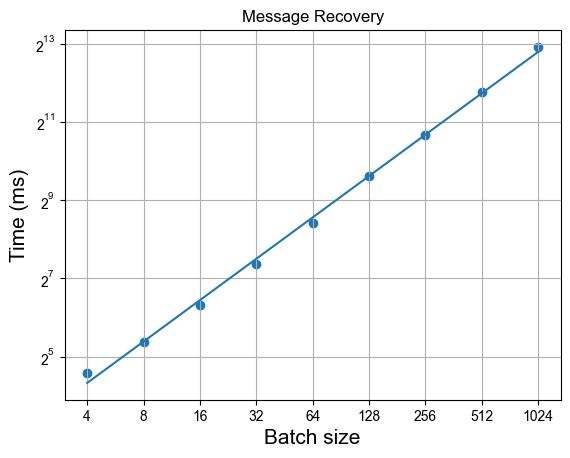

In [3]:
# plot scattergraph on data with axis log-log
plt.scatter(sizes, partial_decrypt_mean, marker='o', label='Message Recovery')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(np.log(sizes), np.log(partial_decrypt_mean), 1)

# plot linear regression line
plt.plot(sizes, np.exp(b) * np.power(sizes, m), label='Linear Regression')

# set log-log scale
plt.xscale('log', base = 2)
plt.yscale('log', base = 2)

# turn on grid
plt.grid(True, which="both", ls="-")

# mark all xdata points
plt.xticks(sizes, sizes)

# set xtick and ytick label size to 10
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ylabel is time in ms units
plt.ylabel('Time (ms)', fontsize=15)

# xlabel is batch size
plt.xlabel('Batch size', fontsize=15)

# title is Partial Decryption
plt.title('Message Recovery')

# add a theme
plt.style.use('seaborn-v0_8-darkgrid')

# save the graph as a png file
plt.savefig('decrypt_all.png', dpi=1200)